In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df_merge = pd.read_parquet('../data/train/merged_data.parquet')

In [3]:
df_merge.head()

variantid                                         categories  \
0   47920382  {"1": "EPG", "2": "Детские товары", "3": "Игру...   
1   49801845  {"1": "EPG", "2": "Хобби и творчество", "3": "...   
2   49853444  {"1": "EPG", "2": "Хобби и творчество", "3": "...   
3   49893028  {"1": "EPG", "2": "Хобби и творчество", "3": "...   
4   49987483  {"1": "EPG", "2": "Хобби и творчество", "3": "...   

                   characteristic_attributes_mapping  \
0  {"Цвет товара": ["бежевый", "светло-розовый"],...   
1  {"Количество в упаковке, шт": ["1"], "Бренд": ...   
2  {"Бренд": ["Vervaco"], "Тип": ["Набор для выши...   
3  {"Цвет товара": ["серый"], "Ширина, см": ["0.8...   
4  {"Цвет товара": ["разноцветный"], "Название цв...   

                       main_pic_embeddings_resnet_v1  \
0  [[0.8170074820518494, 0.9416620135307312, 0.31...   
1  [[-0.43339717388153076, -0.17318281531333923, ...   
2  [[0.11314830183982849, -0.34010639786720276, -...   
3  [[0.25037717819213867, 0.33753663301467896, 0....   
4  [[0.43453288078308105, 0.09419603645801544, -0...   

                            pic_embeddings_resnet_v1  \
0  [[0.20931944251060486, -0.29257065057754517, -...   
1                                               None   
2                                               None   
3                                               None   
4  [[-0.18672508001327515, -0.2851635217666626, -...   

                                                name  \
0      Игрушка для ванной , сувенир Уточка Дьяволица   
1            Стразы(бусины) клеевые на листе 9*16 см   
2  Набор для вышивания Vervaco "Подушка. Геометри...   
3  Кружево коклюшечное "Prym", цвет: серый, 8 мм,...   
4      Оригами Настольная игра Фиксики Кодовый замок   

                                         description  \
0  Серия  уточек бренда FUNNY DUCKS представлена ...   
1            Стразы(бусины) клеевые на листе 9*16 см   
2  Состав набора: канва-страмин Zweigart с нанесе...   
3  Кружево коклюшечное "Prym" предназначено для о...   
4  В настольной игре Оригами "Фиксики. Кодовый за...   

                                        name_bert_64  
0  [-0.24964939057826996, 0.6433379650115967, 0.4...  
1  [-0.6397916078567505, 0.3660058379173279, 0.67...  
2  [-0.27170804142951965, 0.3709857165813446, 0.4...  
3  [-0.5911799669265747, 0.45404374599456787, 0.4...  
4  [-0.29846125841140747, 0.41105785965919495, 0....

In [4]:
df_merge.shape

(2252569, 8)

Просмотрим сколько пропусков в разных столбцах

In [5]:
df = df_merge

# Общая статистика по пустым значениям в столбцах
na_counts_per_column = df.isna().sum()
print("\nКоличество пустых значений в каждом столбце:")
print(na_counts_per_column)

# Процентное соотношение пустых значений в столбцах
na_percentage_per_column = df.isna().mean() * 100
print("\nПроцент пустых значений в каждом столбце:")
print(na_percentage_per_column)


Количество пустых значений в каждом столбце:
variantid                                 0
categories                                0
characteristic_attributes_mapping         0
main_pic_embeddings_resnet_v1             0
pic_embeddings_resnet_v1             588396
name                                      0
description                          262398
name_bert_64                              0
dtype: int64

Процент пустых значений в каждом столбце:
variantid                             0.000000
categories                            0.000000
characteristic_attributes_mapping     0.000000
main_pic_embeddings_resnet_v1         0.000000
pic_embeddings_resnet_v1             26.121109
name                                  0.000000
description                          11.648833
name_bert_64                          0.000000
dtype: float64


Функция для определения количества уникальных значений в категориях

In [6]:
def print_n_categories(df, n):
    """
    Функция выводит n первых строк категорий
    
    """
    for row in df[:n]['categories']:
        print(row)

def separate_categories(cat):
    """
    Вспомогательная функция для преобразования строки с категориями.
    некоторые категории идут в формате
    категория1, категория2 и возможно лучше такие случаи разделять на несколько категорий
    """
    cat_list = [i.strip() for i in cat.split(',')]
    return cat_list


def get_categoricals_in_row(row):
    """
    Функция берет строку с категориями, преобразует ее в виде set со всеми категориями для товара

    return: set

    """
    s = set()
    dct = json.loads(row)
    for val in dct.values():
        s.update(separate_categories(val))
    return s

def get_uniq_categories(df):
    """
    Функция возвращает set из уникальных категорий

    return: set

    """
    uniq_values = set()
    for row in df[:]['categories']:
        #print(row)
        uniq_values.update(get_categoricals_in_row(row))

    return uniq_values

def get_count_by_each_cat(df):
    """
    Функция которая относительно каждой категории пишет сколько раз такая категория встречалась

    return: dict
    {category: count}
    
    """
    result_dict = dict()
    for row in df[:]['categories']:
        row_cat = get_categoricals_in_row(row)
        for cat in list(row_cat):
            if result_dict.get(cat) is None:
                result_dict[cat] = 1
            else:
                result_dict[cat] += 1
    return result_dict




In [7]:
print_n_categories(df_merge, 10)

{"1": "EPG", "2": "Детские товары", "3": "Игрушки", "4": "Игрушка для ванной"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Материал для рукоделия", "4": "Стеклярус, бусины, стразы"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Набор для рукоделия, творчества", "4": "Набор для вышивания"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Нитки, пряжа", "4": "Тесьма, кружево, лента, резинка"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Настольные и карточные игры", "4": "Настольная игра"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Настольные и карточные игры", "4": "Настольная игра"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Материал для рукоделия", "4": "Глина"}
{"1": "EPG", "2": "Хобби и творчество", "3": "Материал для рукоделия", "4": "Стеклярус, бусины, стразы"}
{"1": "EPG", "2": "Дом и сад", "3": "Подушки, одеяла", "4": "Одеяло"}
{"1": "EPG", "2": "Дом и сад", "3": "Столовая посуда", "4": "Чайник заварочный"}


In [8]:
uniq_cat = get_uniq_categories(df_merge)
cat_counts = get_count_by_each_cat(df_merge)
print("Set со всеми категориями:")
print(uniq_cat)
print("Все категории в формате {category: count}:")
print(cat_counts)
print("Всего категорий:")
print(len(uniq_cat))

Set со всеми категориями:
{'Органайзер настольный', 'Сейф оружейный', 'Оснастка для инструмента', 'сверло', 'Кровля', 'Жидкие обои', 'Кондитерские изделия', 'Ароматический диффузор', 'Сайдинг', 'Клей для напольного покрытия', 'накидка', 'Фискальный регистратор', 'Набор для бритья', 'Бумага подарочная', 'Датчик', 'Чехол для кия', 'Краска для волос', 'Молочный напиток', 'Поводок', 'Фон для аквариума', 'Очки компьютерные', 'Трос', 'Аксессуары для обуви', 'Аварийное освещение', 'кисточка', 'Спортивная настольная игра', 'Ситечко для заварки', 'Инструмент для витражных работ', 'Инфузионная система', 'Коврик под лоток', 'игровой центр с бассейном детский', 'Терка педикюрная', 'талисман', 'Накидка на сиденье', 'Аксессуар для сушилки овощей и фруктов', 'Клюшка для гольфа', 'Запчасти для кузова', 'Автомобильные органайзеры и сумки', 'замки и фурнитура', 'Экипировка и защита', 'Кронштейны для ТВ и мониторов', 'Снэки', 'Диадема', 'Кератин', 'спорт', 'сливки', 'Обруч', 'Набор маникюрных инструменто

график 100 наиболее встречающихся категорий

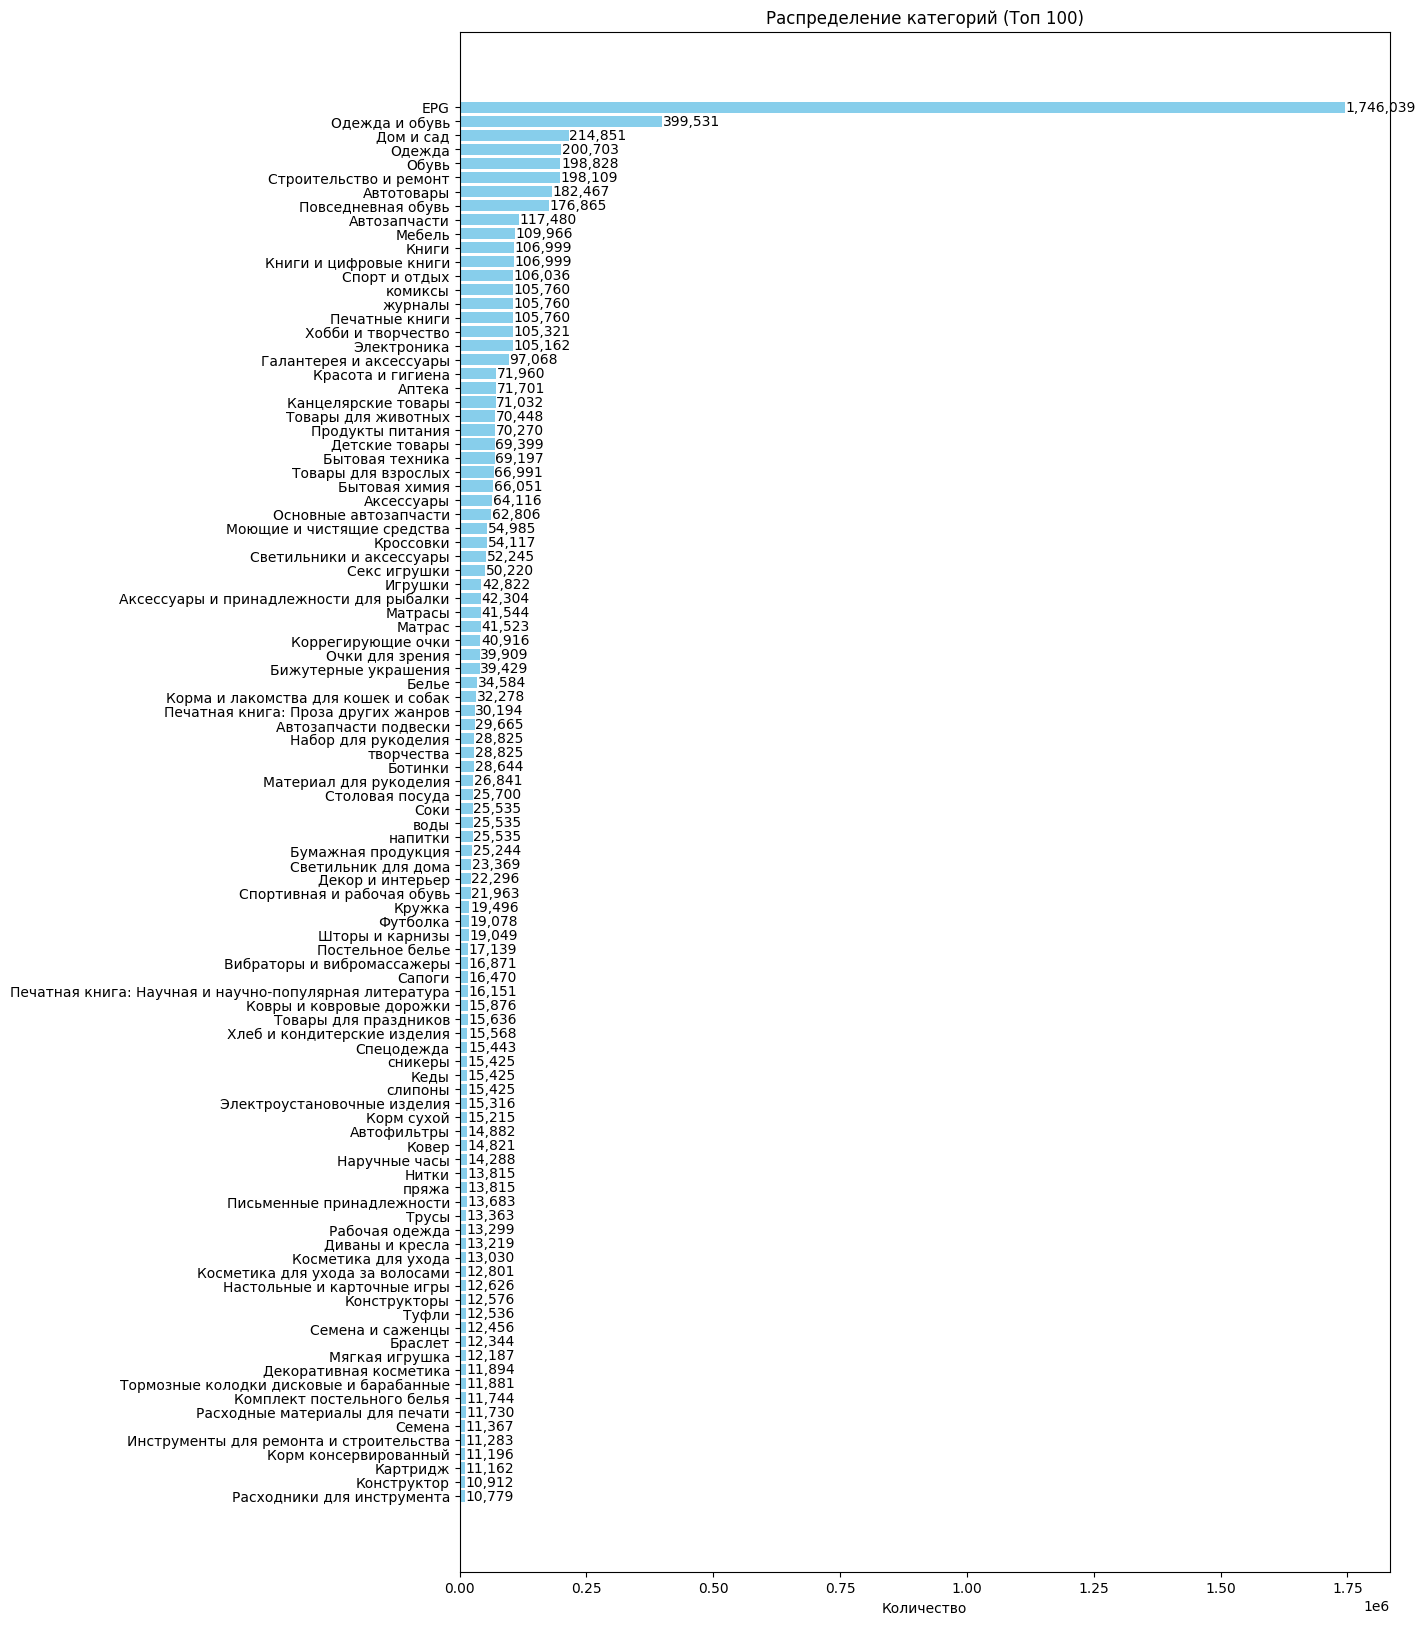

In [9]:
sorted_data = dict(sorted(cat_counts.items(), key=lambda item: item[1], reverse=True))

top_100_data = dict(list(sorted_data.items())[:100])

# Построение горизонтальной гистограммы для первых 100 элементов
plt.figure(figsize=(12, 20))
bars = plt.barh(list(top_100_data.keys()), list(top_100_data.values()), color='skyblue')
plt.xlabel('Количество')
plt.title('Распределение категорий (Топ 100)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наибольшие значения были сверху

# Добавление меток с количеством рядом с каждым столбиком
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000,  # Смещение метки по оси X
             bar.get_y() + bar.get_height()/2,  # Вертикальное расположение метки
             f'{int(width):,}',  # Текст метки с форматированием числа
             va='center')

plt.show()

Теперь посмотрим что у нас с атрибутами 

In [33]:
def print_n_attributes(df, n):
    """
    Функция выводит n первых атрибутов
    
    """
    for row in df[:n]['characteristic_attributes_mapping']:
        print(row)

def get_frequent_attributes(df):
    """
    Функция возвращает dict из чаще встречающихся атрибутов атрибутов

    return: dict

    """
    result_dict = dict()
    for row in df[:]['characteristic_attributes_mapping']:
        #print(row)
        row_dct = json.loads(row)


        for key, val in row_dct.items():
            if result_dict.get(key) is None:
                result_dict[key] = 1
            else:
                result_dict[key] += 1

    return result_dict

def is_number(s):
    try:
        float(s)  # Попробуем преобразовать строку в float
        return True
    except ValueError:
        return False

def get_frequent_num_attributes(df):
    """
    Функция возвращает dict из чаще встречающихся атрибутов атрибутов

    return: dict

    """
    result_dict = dict()
    for row in df[:]['characteristic_attributes_mapping']:
        #print(row)
        row_dct = json.loads(row)


        for key, val in row_dct.items():
            flag = True
            for v in val:
                if not is_number(v):
                    flag = False
                    break
            if not flag:
                continue
            if result_dict.get(key) is None:
                result_dict[key] = 1
            else:
                result_dict[key] += 1

    return result_dict


def get_uniq_attributes(df):
    """
    Функция возвращает dict из уникальных атрибутов

    return: dict

    """
    result_dict = dict()
    for row in df[:]['characteristic_attributes_mapping']:
        #print(row)
        row_dct = json.loads(row)


        for key, val in row_dct.items():
            if result_dict.get(key) is None:
                result_dict[key] = set()
                result_dict[key].update(val)
            else:
                result_dict[key].update(val)

    return result_dict

def get_uniq_attributes_count(uniq_attr):
    """
    Функция возвращает dict из атрибута: количества элементов

    return: dict

    """
    result_dict = dict()
    for key, val in uniq_attr.items():
        result_dict[key] = len(val)

    return result_dict

In [11]:
print_n_attributes(df_merge, 10)

{"Цвет товара": ["бежевый", "светло-розовый"], "Пол ребенка": ["Унисекс"], "Бренд": ["Funny Ducks"], "Тип": ["Игрушка для ванной"], "Страна-изготовитель": ["Китай"], "Развитие навыков": ["Воображение", "Кругозор", "Моторика"], "Код ТРУ": ["320000000.03051400500000000000"], "Минимальный возраст ребенка": ["От 3 лет"], "Материал": ["ПВХ пластизоль"], "Вес товара, г": ["50"], "Максимальный возраст ребенка": ["До 18 лет"]}
{"Количество в упаковке, шт": ["1"], "Бренд": ["Нет бренда"], "Тип": ["Стразы"], "Материал": ["Акрил"], "Вес товара, г": ["20"]}
{"Бренд": ["Vervaco"], "Тип": ["Набор для вышивания"], "Страна-изготовитель": ["Бельгия"], "Материалы набора": ["Акрил", "Бумага", "Канва", "Металл", "Хлопок"], "Техника вышивки": ["Простой крест"], "Возрастные ограничения": ["От 7 лет"], "Длина по горизонтали, см": ["40"], "Длина по вертикали, см": ["40"], "Размеры, мм": ["400 х 400"]}
{"Цвет товара": ["серый"], "Ширина, см": ["0.8"], "Бренд": ["Prym"], "Тип": ["Тесьма"], "Состав ниток": ["Тка

In [12]:
uniq_attr = get_uniq_attributes(df_merge)
#print(uniq_attr)
print(len(uniq_attr))

uniq_attr_count = get_uniq_attributes_count(uniq_attr)
print(uniq_attr_count)
#print(len(uniq_attr_count))

6016
{'Цвет товара': 526, 'Пол ребенка': 3, 'Бренд': 57885, 'Тип': 10735, 'Страна-изготовитель': 179, 'Развитие навыков': 17, 'Код ТРУ': 210, 'Минимальный возраст ребенка': 31, 'Материал': 1079, 'Вес товара, г': 11312, 'Максимальный возраст ребенка': 29, 'Количество в упаковке, шт': 275, 'Материалы набора': 112, 'Техника вышивки': 23, 'Возрастные ограничения': 47, 'Длина по горизонтали, см': 308, 'Длина по вертикали, см': 311, 'Размеры, мм': 92293, 'Ширина, см': 1891, 'Состав ниток': 82, 'Длина, м': 899, 'Название цвета': 176919, 'Минимальная продолжительность партии, мин.': 22, 'Минимальное число игроков': 12, 'Максимальное число игроков': 26, 'Вид выпуска товара': 3, 'Целевая аудитория': 6, 'Вид настольной игры': 24, 'Максимальная продолжительность партии, мин.': 31, 'Целевая аудитория игры': 6, 'Артикул': 493232, 'Вес, кг': 2444, 'Размерность': 429, 'Материал чехла': 108, 'Материал наполнителя': 232, 'Плотность наполнителя, г/м2': 99, 'Количество предметов в комплекте': 41, 'Техноло

In [25]:
freaken_attr = get_frequent_attributes(df_merge)
print(freaken_attr)

{'Цвет товара': 1381119, 'Пол ребенка': 108569, 'Бренд': 1746063, 'Тип': 1931112, 'Страна-изготовитель': 1748652, 'Развитие навыков': 5324, 'Код ТРУ': 6357, 'Минимальный возраст ребенка': 99692, 'Материал': 769665, 'Вес товара, г': 540579, 'Максимальный возраст ребенка': 54792, 'Количество в упаковке, шт': 114099, 'Материалы набора': 13579, 'Техника вышивки': 6242, 'Возрастные ограничения': 54138, 'Длина по горизонтали, см': 17175, 'Длина по вертикали, см': 17223, 'Размеры, мм': 235700, 'Ширина, см': 233423, 'Состав ниток': 9579, 'Длина, м': 53577, 'Название цвета': 732048, 'Минимальная продолжительность партии, мин.': 1691, 'Минимальное число игроков': 6270, 'Максимальное число игроков': 4993, 'Вид выпуска товара': 316720, 'Целевая аудитория': 336181, 'Вид настольной игры': 4630, 'Максимальная продолжительность партии, мин.': 1520, 'Целевая аудитория игры': 5406, 'Артикул': 558641, 'Вес, кг': 36492, 'Размерность': 7454, 'Материал чехла': 45804, 'Материал наполнителя': 87099, 'Плотност

In [34]:
freaken_attr_num = get_frequent_num_attributes(df_merge)
print(freaken_attr_num)
print(len(freaken_attr_num))

{'Код ТРУ': 6354, 'Вес товара, г': 540307, 'Количество в упаковке, шт': 114053, 'Длина по горизонтали, см': 17174, 'Длина по вертикали, см': 17222, 'Ширина, см': 233414, 'Длина, м': 53528, 'Минимальная продолжительность партии, мин.': 1690, 'Минимальное число игроков': 6269, 'Максимальное число игроков': 4992, 'Максимальная продолжительность партии, мин.': 1520, 'Вес, кг': 36487, 'Плотность наполнителя, г/м2': 1805, 'Количество предметов в комплекте': 23505, 'Артикул': 128807, 'Объем, мл': 129913, 'Количество ламп, шт': 44719, 'Макс. мощность ламп, Вт': 42451, 'Площадь освещения, кв.м': 29906, 'Единиц в одном товаре': 455228, 'Число стирок': 6271, 'Размер крышки, см': 3176, 'Диаметр дна, см': 2893, 'Расход, кг/м2': 1260, 'Рекомендуемое количество слоев': 3565, 'Время высыхания, часов': 4382, 'Срок годности в днях': 149662, 'Объем, л': 22580, 'Расход, л/м2': 2696, 'Длина шампура, см': 48, 'Количество шампуров, шт': 80, 'Толщина, мм': 25880, 'Длина, см': 170092, 'Ширина/диаметр, мм': 261

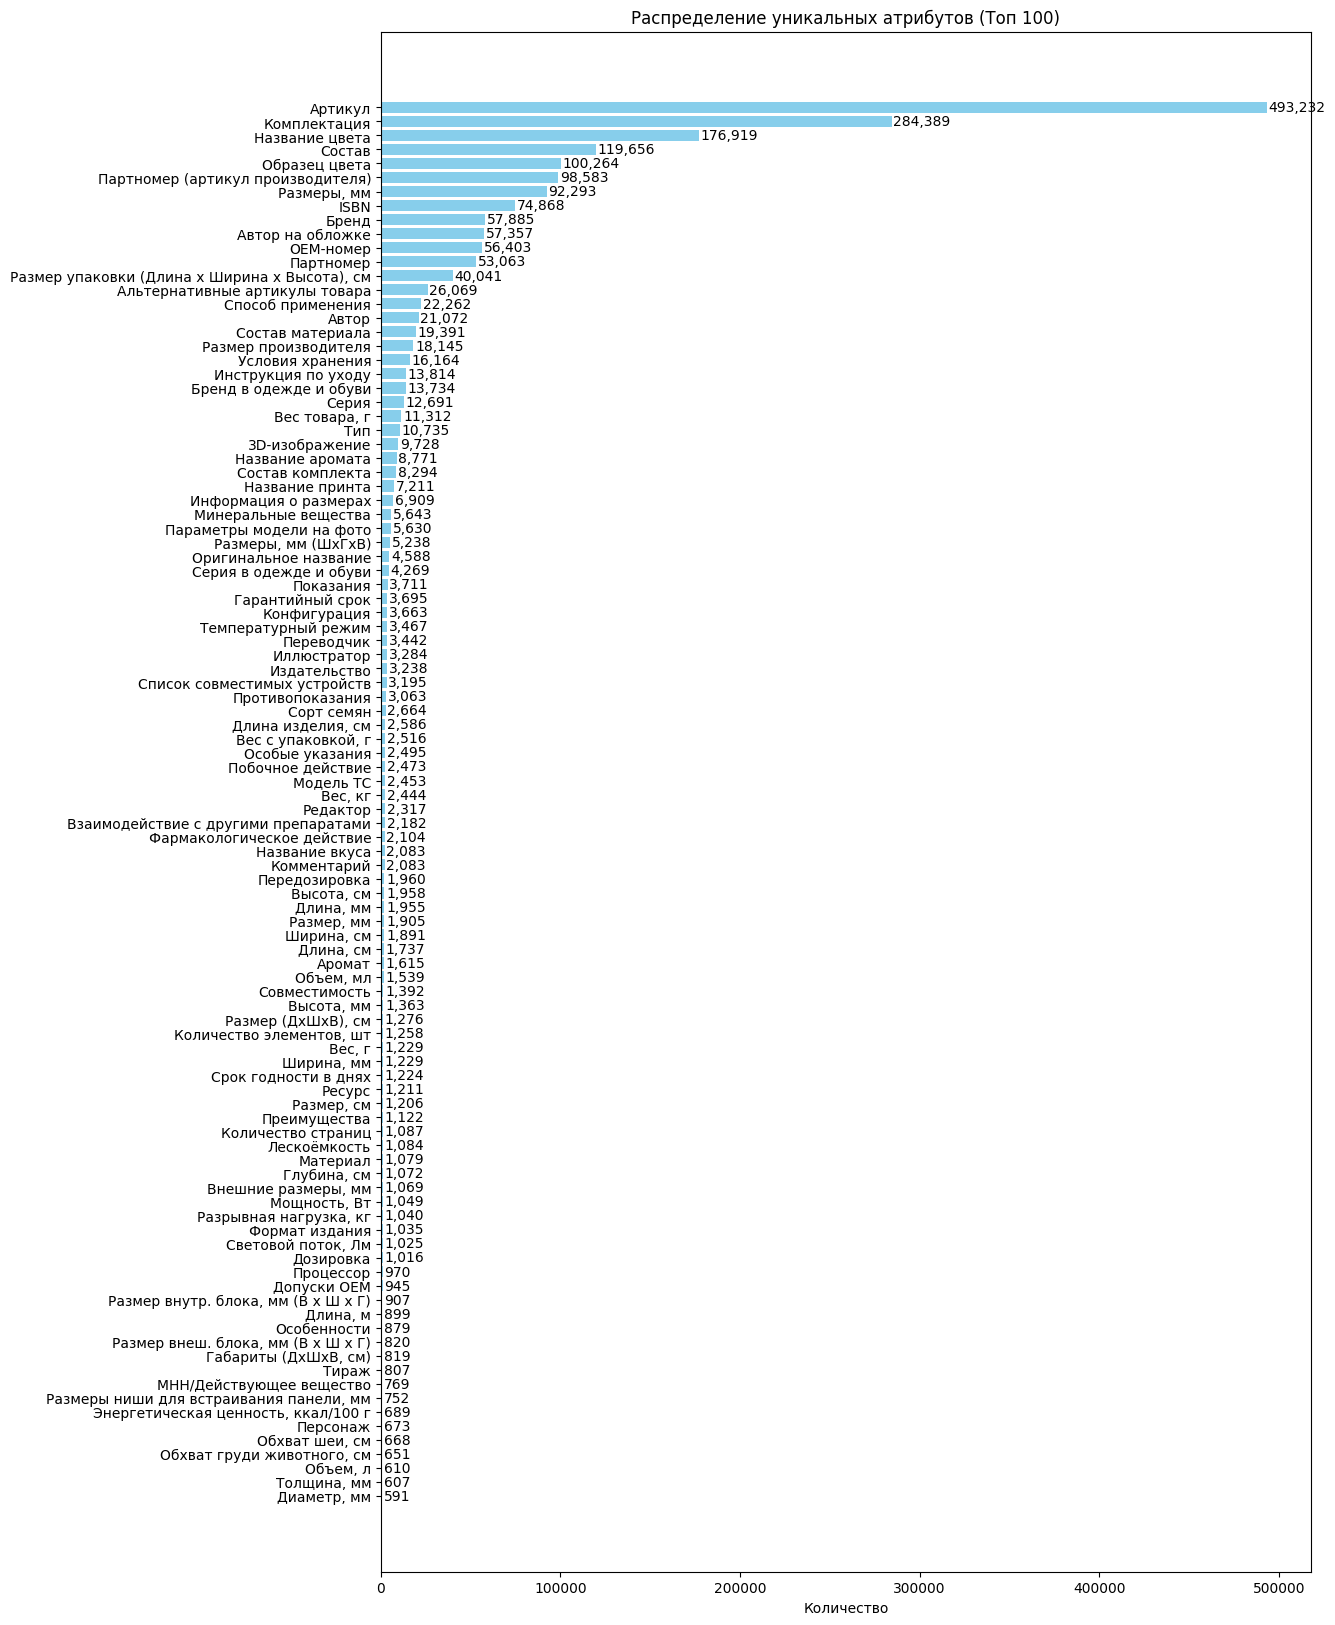

In [26]:
sorted_data = dict(sorted(uniq_attr_count.items(), key=lambda item: item[1], reverse=True))

top_100_data = dict(list(sorted_data.items())[:100])

# Построение горизонтальной гистограммы для первых 100 элементов
plt.figure(figsize=(12, 20))
bars = plt.barh(list(top_100_data.keys()), list(top_100_data.values()), color='skyblue')
plt.xlabel('Количество')
plt.title('Распределение уникальных атрибутов (Топ 100)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наибольшие значения были сверху

# Добавление меток с количеством рядом с каждым столбиком
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000,  # Смещение метки по оси X
             bar.get_y() + bar.get_height()/2,  # Вертикальное расположение метки
             f'{int(width):,}',  # Текст метки с форматированием числа
             va='center')

plt.show()

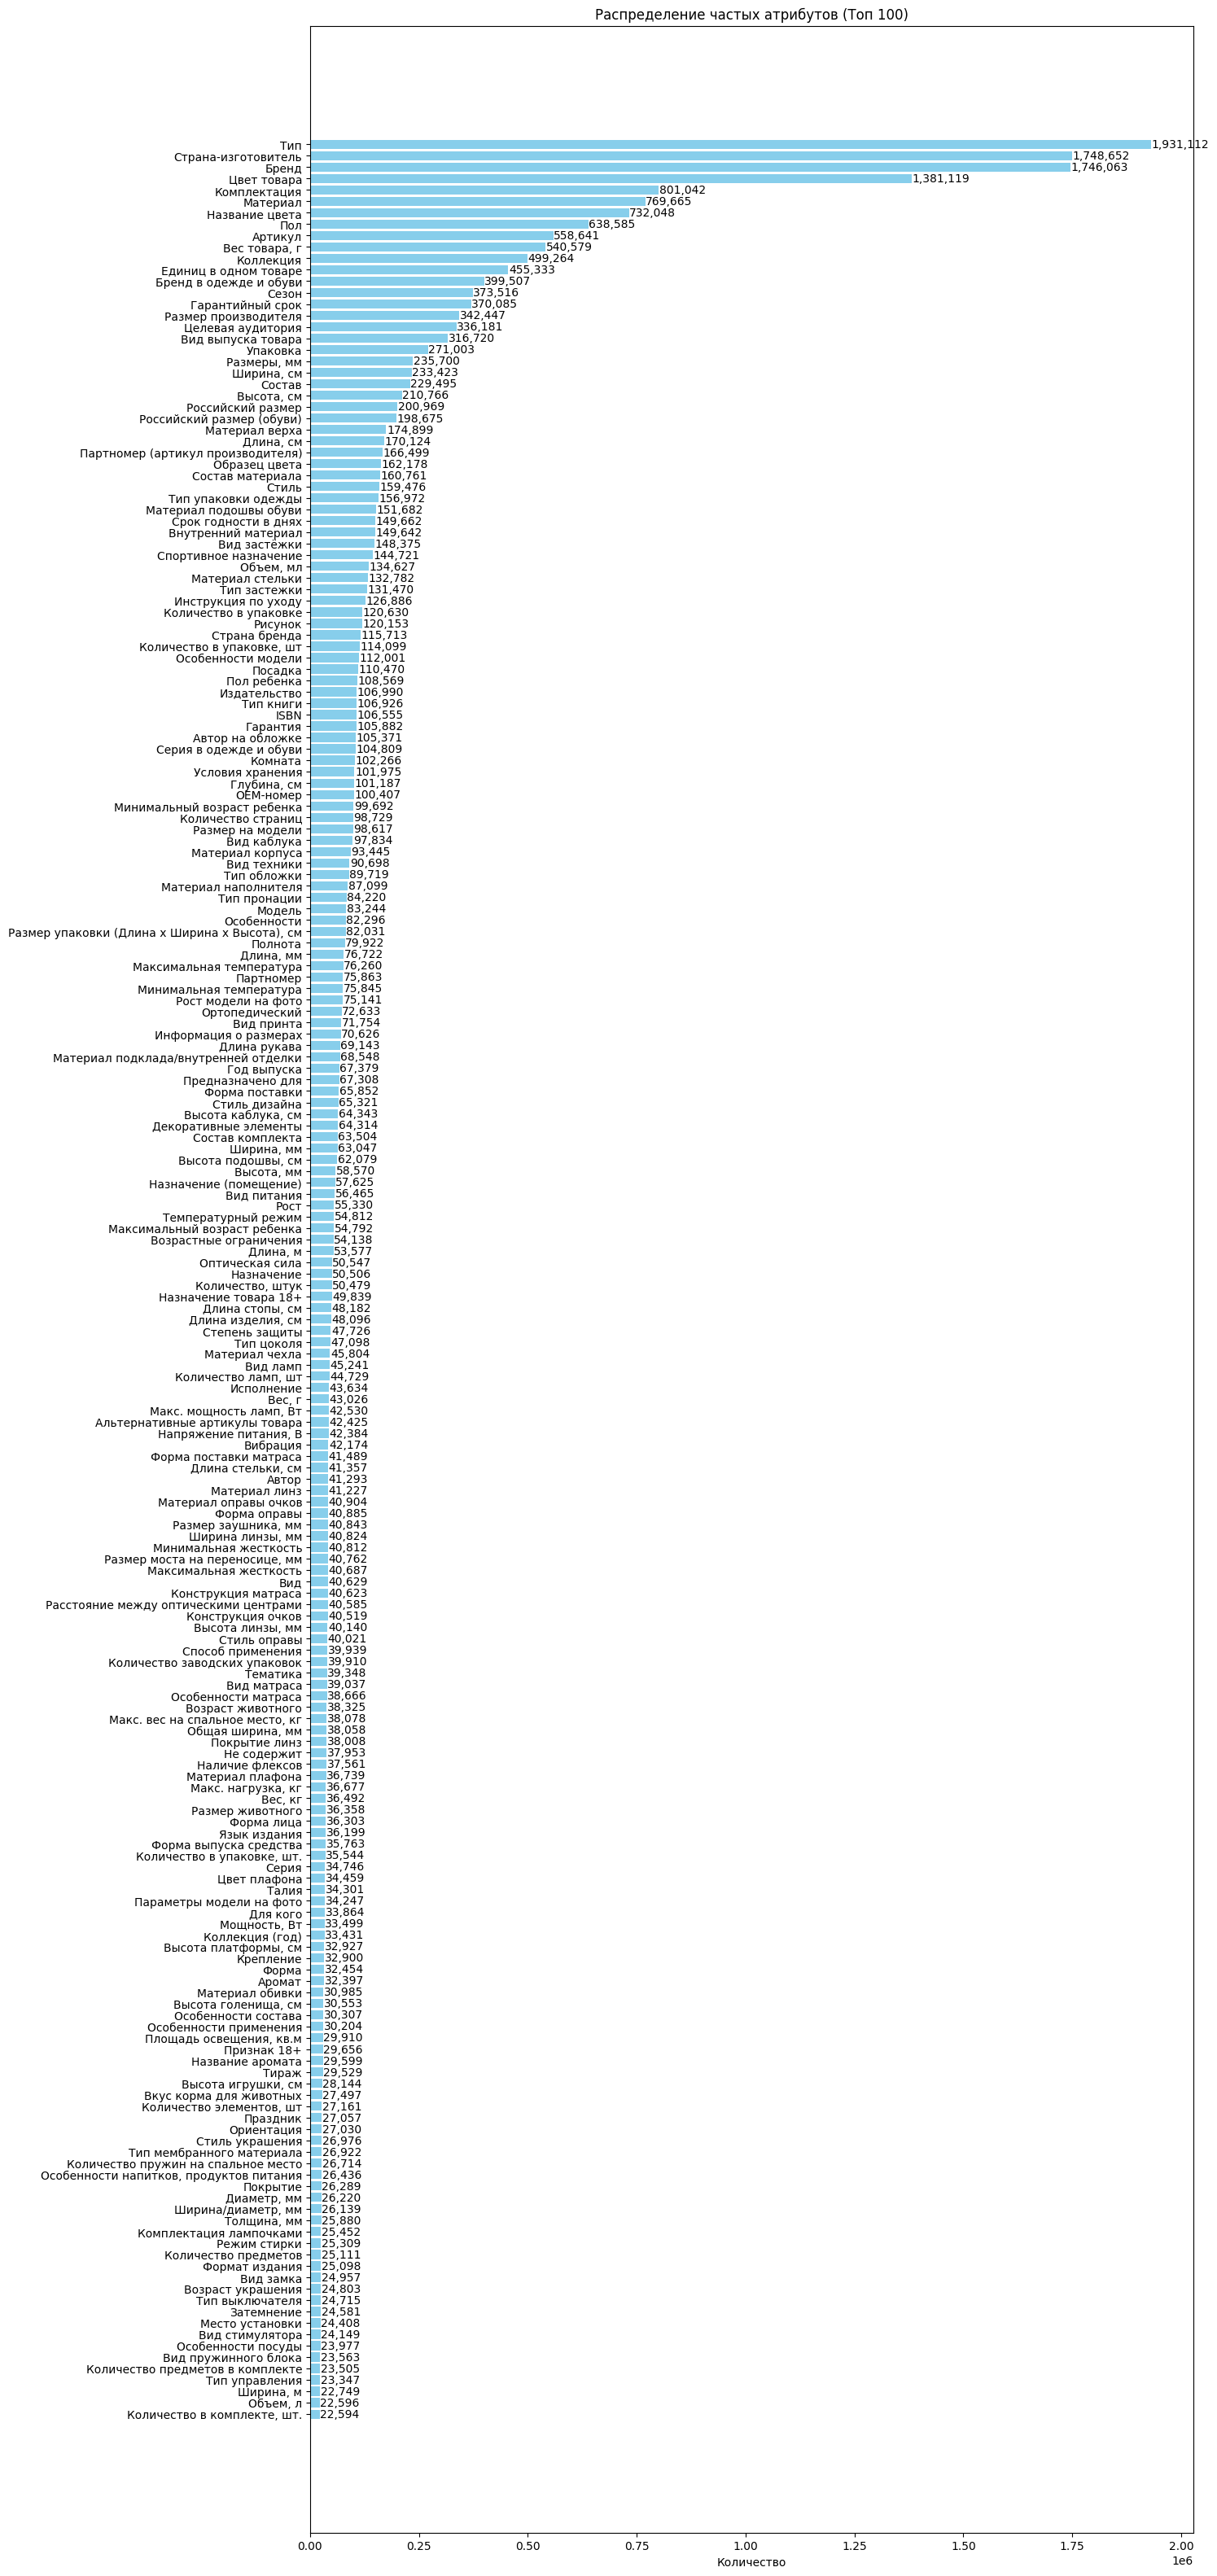

In [30]:
sorted_data = dict(sorted(freaken_attr.items(), key=lambda item: item[1], reverse=True))

top_100_data = dict(list(sorted_data.items())[:200])

# Построение горизонтальной гистограммы для первых 100 элементов
plt.figure(figsize=(14, 40))
bars = plt.barh(list(top_100_data.keys()), list(top_100_data.values()), color='skyblue')
plt.xlabel('Количество')
plt.title('Распределение частых атрибутов (Топ 100)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наибольшие значения были сверху

# Добавление меток с количеством рядом с каждым столбиком
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000,  # Смещение метки по оси X
             bar.get_y() + bar.get_height()/2,  # Вертикальное расположение метки
             f'{int(width):,}',  # Текст метки с форматированием числа
             va='center')

plt.show()

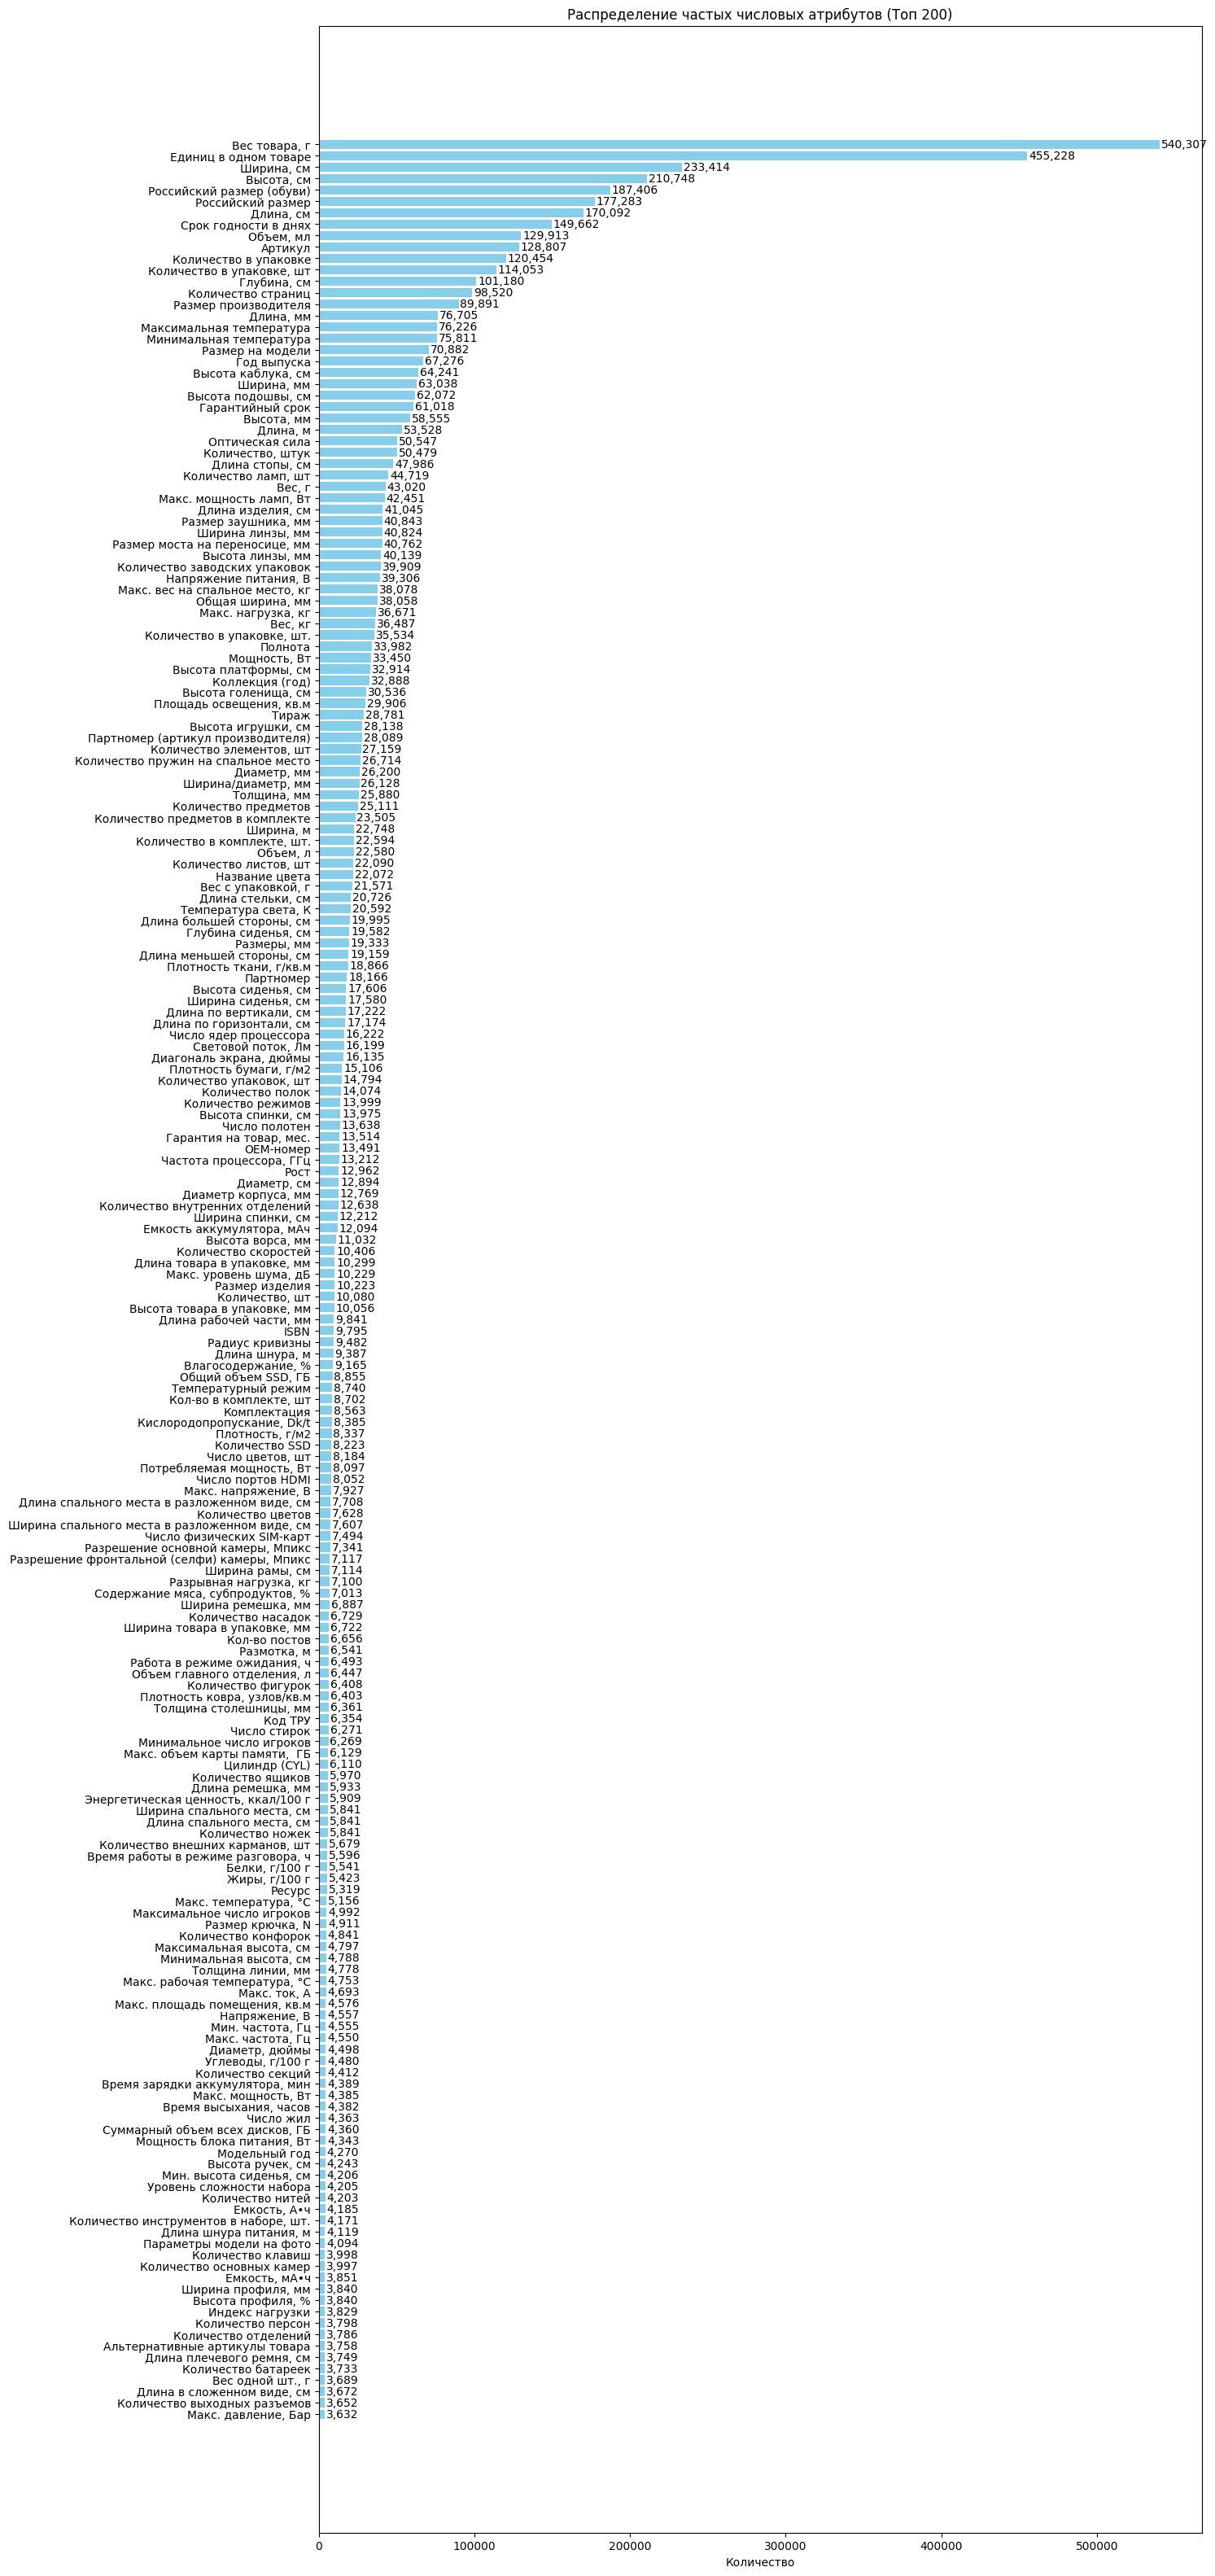

In [36]:
sorted_data = dict(sorted(freaken_attr_num.items(), key=lambda item: item[1], reverse=True))

top_100_data = dict(list(sorted_data.items())[:200])

# Построение горизонтальной гистограммы для первых 200 элементов
plt.figure(figsize=(14, 40))
bars = plt.barh(list(top_100_data.keys()), list(top_100_data.values()), color='skyblue')
plt.xlabel('Количество')
plt.title('Распределение частых числовых атрибутов (Топ 200)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наибольшие значения были сверху

# Добавление меток с количеством рядом с каждым столбиком
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000,  # Смещение метки по оси X
             bar.get_y() + bar.get_height()/2,  # Вертикальное расположение метки
             f'{int(width):,}',  # Текст метки с форматированием числа
             va='center')

plt.show()

Выведем несколько Descriptions

In [13]:
def print_n_descriptions(df, n):
    """
    Функция выводит n первых описаний
    
    """
    for row in df[:n]['description']:
        print(row)

In [14]:
print(print_n_descriptions(df_merge, 10))

Серия  уточек бренда FUNNY DUCKS представлена уточками стандартной формы, которые раскрашены в моноцвета или украшены каким-либо узором, орнаментом, простым головным убором. Данные уточки изображают лиц конкретной профессии, животных или героев книг и фильмов.<br/>Дизайнерские уточки - это еще и яркий сувенир интересной формы.
Стразы(бусины) клеевые на листе 9*16 см
Состав набора: канва-страмин Zweigart с нанесенным рисунком №4,5 (18 клеточек/10 см) 100% хлопок, нитки 100% акрил, обратная сторона подушки с молнием (джинсовая ткань 100% хлопок), игла, схема, инструкция на русском языке. <br> Внимание: наполнитель не входит в набор. <br> Размер готовой работы: диаметр 40 см. <br> Вышивание крестом отвлечет вас от повседневных забот и превратится в увлекательное занятие! Работа, сделанная своими руками, создаст особый уют и атмосферу в доме и долгие годы будет радовать вас и ваших близких. <br> Размер готовой работы: 40х28 см. <br> Техника вышивания - печатный крест, полная вышивка. <br> 

Сейчас рассмотрим данные в train 

In [15]:
df_train = pd.read_parquet('../data/train/train.parquet')

In [16]:
df_train.head()

variantid1  variantid2  target
0  1447875869  1447872068       1
1  1176231201   284733670       1
2   658617865   549848659       0
3   719320625   719370486       1
4  1067645658   949954740       0

оставим только одинаковые данные

In [17]:
df_target = df_train[df_train['target'] == 1]

In [18]:
print("размерность в train:", df_train.shape)
print("размерность в target:", df_target.shape)
df_target.head()

размерность в train: (1168516, 3)
размерность в target: (561848, 3)


variantid1  variantid2  target
0  1447875869  1447872068       1
1  1176231201   284733670       1
3   719320625   719370486       1
6   690909146  1044397832       1
8   479881093   256110461       1

In [19]:
def get_row_by_id(df_merge, id):
    return df_merge[df_merge['variantid'] == id]

In [22]:
for id1, id2 in zip(df_target['variantid1'][:100], df_target['variantid2'][:100]):
    row1 = get_row_by_id(df_merge, id1)
    row2 = get_row_by_id(df_merge, id2)
    print("ID:", id1, id2)
    print("Категории:")
    print("товар 1:", get_categoricals_in_row(row1['categories'].values[0]))
    print("товар 2:", get_categoricals_in_row(row2['categories'].values[0]))
    print("Атрибуты:")
    print("товар 1:", get_uniq_attributes(row1))
    print("товар 2:", get_uniq_attributes(row2))
    print("=================================")

ID: 1447875869 1447872068
Категории:
товар 1: {'Одежда', 'Одежда и обувь', 'джемпер', 'Свитер'}
товар 2: {'Одежда', 'Одежда и обувь', 'джемпер', 'Свитер'}
Атрибуты:
товар 1: {'Серия в одежде и обуви': {"Harper's Bazaar (журнал)"}, 'Модель': {'вязаная'}, 'Тип': {'Свитер'}, 'Страна-изготовитель': {'Япония'}, 'Тип застежки': {'Без застежки'}, 'Российский размер': {'52'}, 'Рост': {'150-180'}, 'Пол': {'Женский'}, 'Тип упаковки одежды': {'Чехол'}, 'Сезон': {'Зима'}, 'Цвет товара': {'светло-бежевый'}, 'Материал': {'Полиэфирное волокно'}, 'Спортивное назначение': {'Туризм'}, 'Длина рукава': {'Длинный'}, 'Стиль': {'Вечернее'}, 'Коллекция': {'Осень-зима 2023'}, 'Рост модели на фото': {'168 см'}, 'Декоративные элементы': {'Разрезы'}, 'Размер на модели': {'42'}, 'Состав материала': {'65%-35%'}, 'Параметры модели на фото': {'86-60-88'}, 'Рисунок': {'Камуфляж'}, 'Размер производителя': {'3XL'}, 'Бренд в одежде и обуви': {'Uniqlo'}}
товар 2: {'Серия в одежде и обуви': {"Harper's Bazaar (журнал)"}, 'М

In [ ]:
def get_count_union_target_cat(df_target):
    """
    Функция которая определяет сколько раз общая категория встречалась в таргет паре

    return: dict
    {category: count}
    
    """
    result_dict = dict()
    for id1, id2 in zip(df_target['variantid1'], df_target['variantid2']):
        row1 = get_row_by_id(df_merge, id1)
        row2 = get_row_by_id(df_merge, id2)
        
        row1_cat = get_categoricals_in_row(row1['categories'].values[0])
        row2_cat = get_categoricals_in_row(row2['categories'].values[0])
        
        for cat in list(row1_cat):
            if cat not in row2_cat:
                continue
            if result_dict.get(cat) is None:
                result_dict[cat] = 1
            else:
                result_dict[cat] += 1
    return result_dict

In [ ]:
target_union = get_count_union_target_cat(df_target)

In [ ]:
print(f"len(target_union) = {len(target_union)}")
print(target_union)

len(target_union) = 4086
{'джемпер': 1626, 'Одежда': 54894, 'Свитер': 1626, 'Одежда и обувь': 116813, 'Наручники и фиксаторы': 671, 'EPG': 413315, 'Товары для взрослых': 25853, 'БДСМ': 3864, 'набор сверл': 651, 'сверло': 651, 'Строительство и ремонт': 46441, 'Бур': 652, 'Расходники для инструмента': 1499, 'Автозапчасти': 47648, 'Автотовары': 62723, 'Основные автозапчасти': 24502, 'Тарелка': 415, 'Столовая посуда': 3586, 'Дом и сад': 34850, 'журналы': 31279, 'комиксы': 31279, 'Печатные книги': 31279, 'Книги и цифровые книги': 31674, 'Печатная книга: Проза других жанров': 4855, 'Книги': 31674, 'Набор для рукоделия': 9043, 'творчества': 9043, 'Хобби и творчество': 27382, 'Набор для творчества': 1380, 'Мебель': 31414, 'Кресло компьютерное': 1508, 'Компьютерные и офисные кресла': 1508, 'свитшот': 2991, 'худи': 2991, 'Толстовка': 2991, 'Ботинки': 8191, 'Повседневная обувь': 53339, 'Обувь': 61919, 'слипоны': 5225, 'Кеды': 5225, 'сникеры': 5225, 'Товары для животных': 14282, 'Корма и лакомства

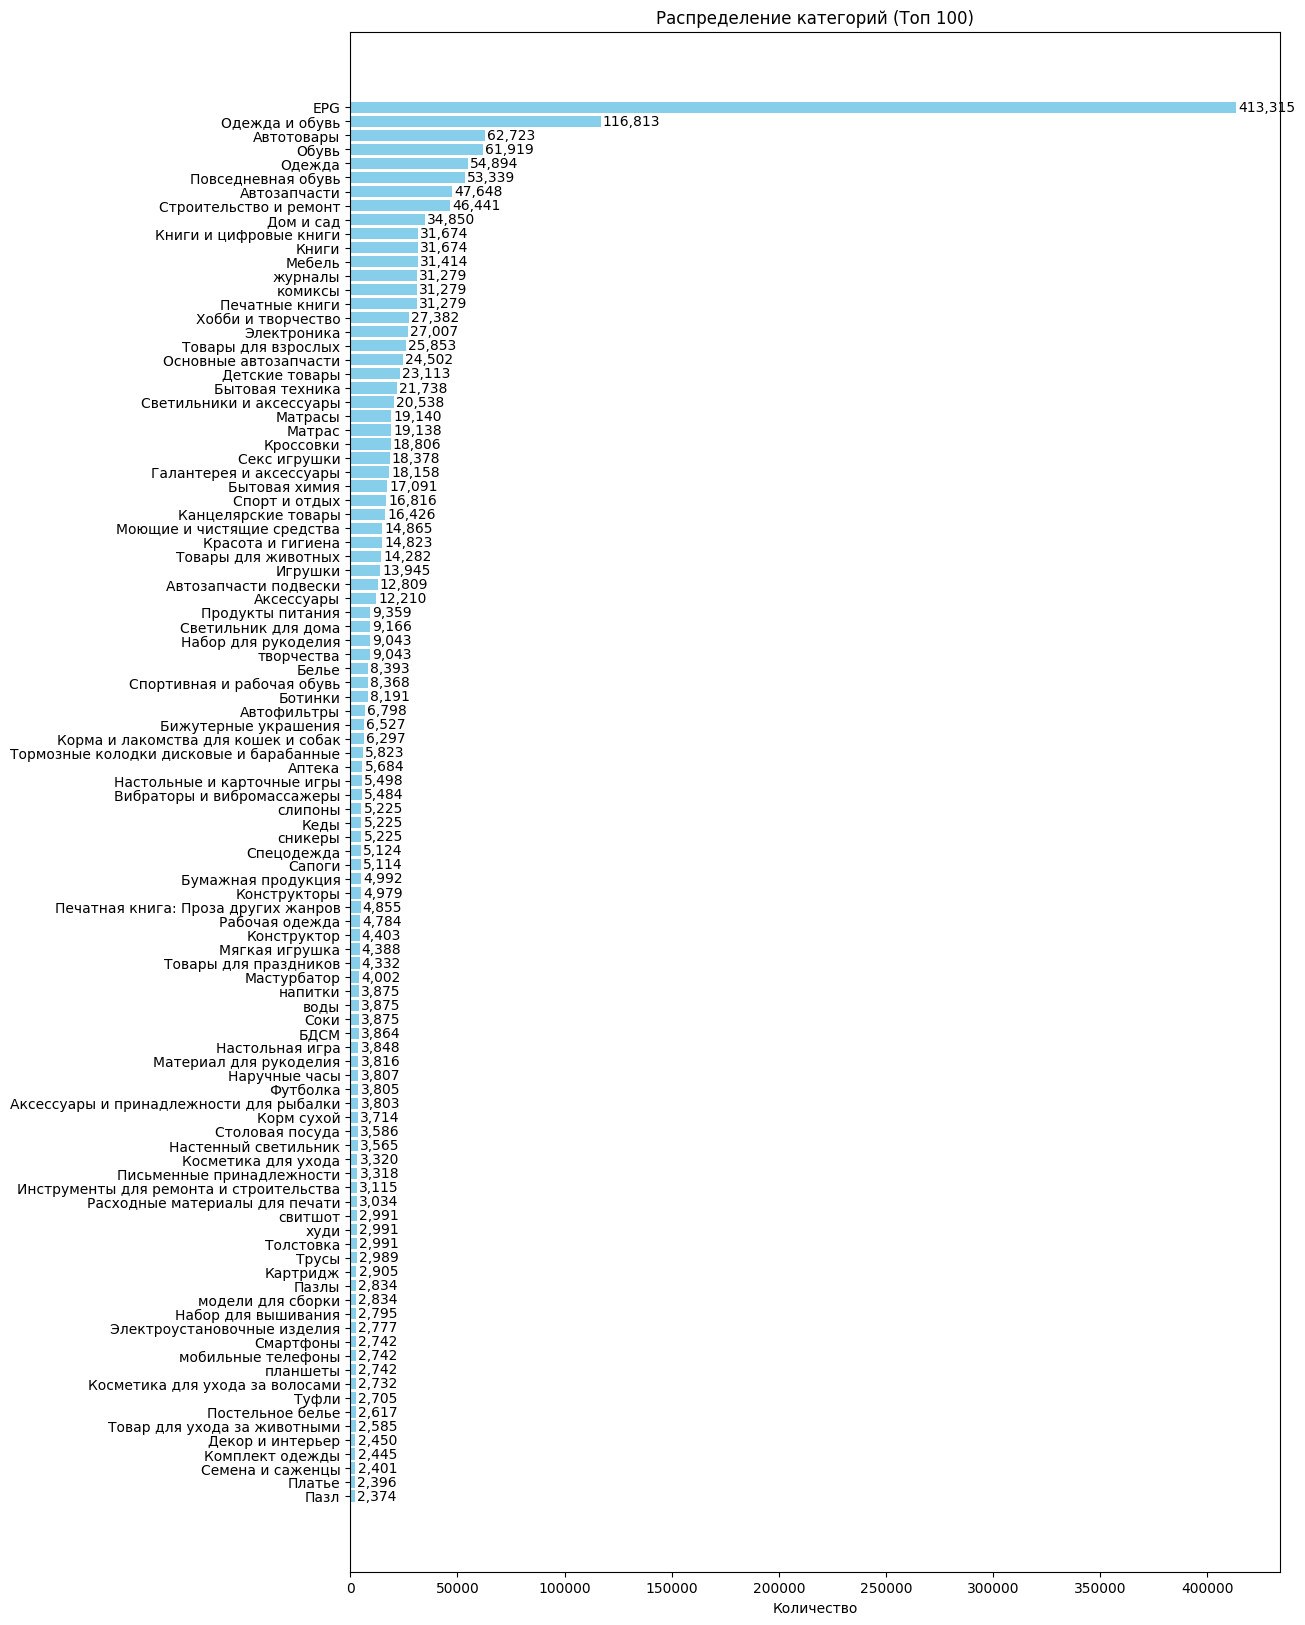

In [ ]:
sorted_data = dict(sorted(target_union.items(), key=lambda item: item[1], reverse=True))

top_100_data = dict(list(sorted_data.items())[:100])

# Построение горизонтальной гистограммы для первых 100 элементов
plt.figure(figsize=(12, 20))
bars = plt.barh(list(top_100_data.keys()), list(top_100_data.values()), color='skyblue')
plt.xlabel('Количество')
plt.title('Распределение категорий (Топ 100)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наибольшие значения были сверху

# Добавление меток с количеством рядом с каждым столбиком
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000,  # Смещение метки по оси X
             bar.get_y() + bar.get_height()/2,  # Вертикальное расположение метки
             f'{int(width):,}',  # Текст метки с форматированием числа
             va='center')

plt.show()